In [1]:
 from google.colab import drive

 drive.mount('/content/drive')

Mounted at /content/drive


**Pre-Processing**

Feature Selection

In [180]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CovidData.csv')


# List of column indices to delete
#columns_to_delete = [0, 1, 4, 8]
columns_to_delete = [1, 4]

# Drop the specified columns
df = df.drop(columns=df.columns[columns_to_delete])
print(df.head())
# raw data size
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

   USMER  SEX  PATIENT_TYPE  INTUBED  PNEUMONIA  AGE  PREGNANT  DIABETES  \
0      2    1             1       97          1   65         2         2   
1      2    2             1       97          1   72        97         2   
2      2    2             2        1          2   55        97         1   
3      2    1             1       97          2   53         2         2   
4      2    2             1       97          2   68        97         1   

   COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  \
0     2       2        2             1              2               2   
1     2       2        2             1              2               2   
2     2       2        2             2              2               2   
3     2       2        2             2              2               2   
4     2       2        2             1              2               2   

   OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  
0        2              2        2      

Replace missing values in dataset with random values

In [181]:
# Replace every instance of 97,98, or 99 with either 1 or 2 randomly
# Now 'df' contains the DataFrame with replacements
#print(df.head())
df.replace(99, np.random.choice([1, 2]), inplace=True)
df.replace(98, np.random.choice([1, 2]), inplace=True)
df.replace(97, np.random.choice([1, 2]), inplace=True)


Classification-Final Feature Binarization

In [182]:
df['CLASIFFICATION_FINAL'].replace(2, 1, inplace=True)
df['CLASIFFICATION_FINAL'].replace(3, 1, inplace=True)
df['CLASIFFICATION_FINAL'].replace(4, 2, inplace=True)
df['CLASIFFICATION_FINAL'].replace(5, 2, inplace=True)
df['CLASIFFICATION_FINAL'].replace(6, 2, inplace=True)
df['CLASIFFICATION_FINAL'].replace(7, 2, inplace=True)

Age Feature Normalization

In [183]:
# Load the data
#df = pd.read_csv('output_file.csv')

df['AGE'] = (df['AGE'] - df['AGE'].min()) / (df['AGE'].max() - df['AGE'].min()) + 1

**Specify Target Feature**

In [184]:
# Pop the specified column
column_to_shift = df.pop('INTUBED')

# Insert the popped column at the end of the DataFrame
df.insert(df.shape[1], column_to_shift.name, column_to_shift)
print(df.head())
print('\nResult dataframe :\n', df)
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

   USMER  SEX  PATIENT_TYPE  PNEUMONIA       AGE  PREGNANT  DIABETES  COPD  \
0      2    1             1          1  1.537190         2         2     2   
1      2    2             1          1  1.595041         1         2     2   
2      2    2             2          2  1.454545         1         1     2   
3      2    1             1          2  1.438017         2         2     2   
4      2    2             1          2  1.561983         1         1     2   

   ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
0       2        2             1              2               2        2   
1       2        2             1              2               2        1   
2       2        2             2              2               2        2   
3       2        2             2              2               2        2   
4       2        2             1              2               2        2   

   RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  INTUBED  
0         

Save Pre-Processed Data to File

In [185]:
#df.replace(2, 0, inplace=True)
df.to_csv('output_file.csv', index=False)


**Data Visualization**

Correlation between features

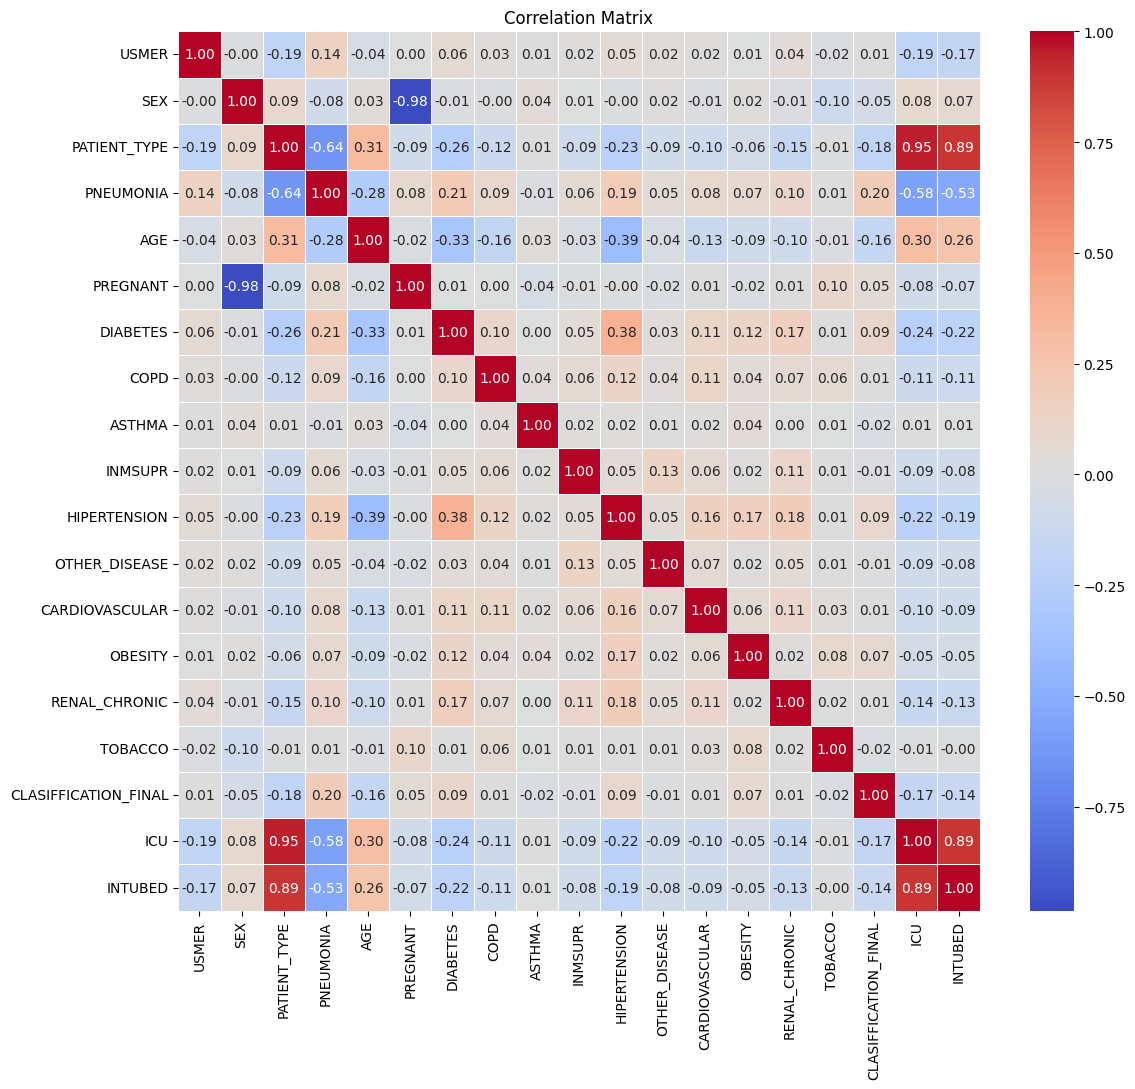

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('output_file.csv')


# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
# Save the plot as an SVG file
plt.tight_layout()
plt.savefig('correlation_matrix.svg', format='svg')
plt.savefig('correlation_matrix.pdf', format='pdf')
plt.savefig('correlation_matrix.jpg', format='jpg')

plt.show()



Correlation between features and output

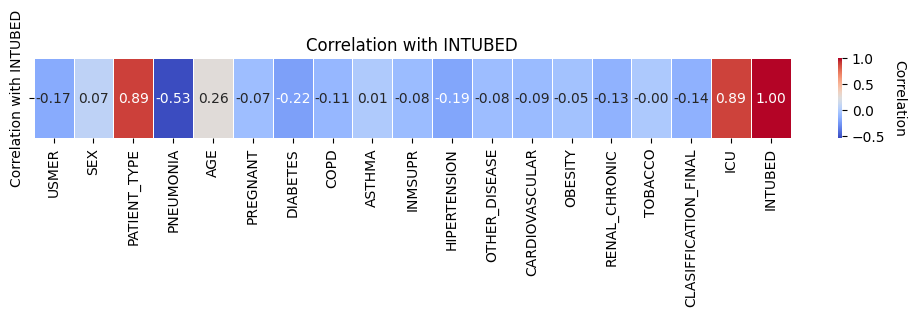

In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df = pd.read_csv('output_file.csv')


# Specify the column name for which you want to calculate correlations
target_column = 'INTUBED'

# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation values for the target column
correlation_with_target = correlation_matrix[target_column]

# Create a DataFrame with the correlation values
correlation_df = pd.DataFrame({'Correlation with ' + target_column: correlation_with_target})

# Create a heatmap using seaborn for the correlation with the target column
plt.figure(figsize=(10, 3))
heatmap = sns.heatmap(correlation_df.T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Add the color bar key
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', rotation=270, labelpad=15)

plt.title('Correlation with ' + target_column)
plt.tight_layout()

plt.savefig('correlation_matrix_INTUBATED.jpg', format='jpg')
plt.show()


Visualize number of '1' and '2' in each feature

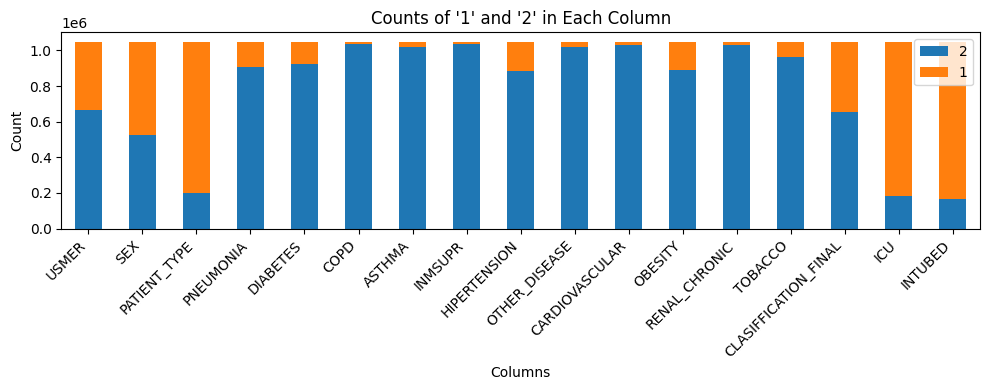

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# List of column indices to delete
columns_to_delete = [4]

# Drop the specified columns
df = df.drop(columns=df.columns[columns_to_delete])

# Create a DataFrame to store the counts of '1' and '2' in each column
count_df = pd.DataFrame()

# Calculate the counts of '1' and '2' in each column
for column in df.columns:
    value_counts = df[column].value_counts()
    count_df[column] = value_counts

# Transpose the DataFrame for better visualization
count_df = count_df.T

# Create a bar plot using pandas
count_df.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.title('Counts of \'1\' and \'2\' in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('0_1_count.jpg', format='jpg')
plt.show()


In [190]:
df = pd.read_csv('output_file.csv')

X = df.iloc[2:, :-1]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048573 entries, 2 to 1048574
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048573 non-null  int64  
 1   SEX                   1048573 non-null  int64  
 2   PATIENT_TYPE          1048573 non-null  int64  
 3   PNEUMONIA             1048573 non-null  int64  
 4   AGE                   1048573 non-null  float64
 5   PREGNANT              1048573 non-null  int64  
 6   DIABETES              1048573 non-null  int64  
 7   COPD                  1048573 non-null  int64  
 8   ASTHMA                1048573 non-null  int64  
 9   INMSUPR               1048573 non-null  int64  
 10  HIPERTENSION          1048573 non-null  int64  
 11  OTHER_DISEASE         1048573 non-null  int64  
 12  CARDIOVASCULAR        1048573 non-null  int64  
 13  OBESITY               1048573 non-null  int64  
 14  RENAL_CHRONIC         1048573 non-

In [191]:
df.head()

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,INTUBED
0,2,1,1,1,1.537190,2,2,2,2,2,1,2,2,2,2,2,1,1,1
1,2,2,1,1,1.595041,1,2,2,2,2,1,2,2,1,1,2,2,1,1
2,2,2,2,2,1.454545,1,1,2,2,2,2,2,2,2,2,2,1,2,1
3,2,1,1,2,1.438017,2,2,2,2,2,2,2,2,2,2,2,2,1,1
4,2,2,1,2,1.561983,1,1,2,2,2,1,2,2,2,2,2,1,1,1


**Impelement Logistic Regression with built-in scikit learn package**

In [192]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# Load the data
df = pd.read_csv('output_file.csv')

# Assuming the last column is the label and the rest are features
X = df.iloc[2:, :-1]  # Features (all columns except the last one)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.iloc[2:, -1])  # Target variable (last column)

# Z-Score Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data to create a validation set (70% training, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# Create and fit the logistic regression model
log_regress = LogisticRegression()
log_regress.fit(X_train, y_train)
#svm_model = SVC()
#svm_model.fit(X, y)

# Make predictions on the test set
#y_pred = svm_model.predict(X)


# Print coefficients and intercept
#coefficients = log_regress.coef_
#intercept = log_regress.intercept_

#print("Coefficients:", coefficients)
#print("Intercept:", intercept)

# Make predictions on the test set
y_pred = log_regress.predict(X_test)

# Print confusion matrix
print(pd.crosstab(y_pred, y_test))

dim = np.shape(X_test)

cnt = 0
for i in range(dim[0]):
  if (y_test[i] == 0 and y_pred[i]==0) or ((y_test[i] == 1 and y_pred[i]==1)):
    cnt = cnt + 1
  else:
    continue

print('Accuracy: ',cnt/dim[0]*100,'%')

col_0       0      1
row_0               
0      171431    905
1        5247  32132
Accuracy:  97.066495005126 %


**Develop Logistic Regression Algorithm with Regularized Cross-Entropy Cost from scratch**





Text(0.5, 1.0, 'Logistic Regression Training with GD Algorithm')

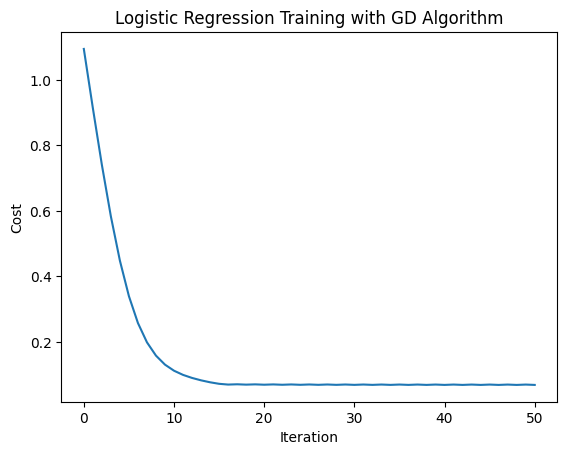

In [199]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# define model
def model(x_p,w):
  # compute linear comb and return
  a = w[0] + np.dot(x_p, w[1:])
  return a

# define sigmoid
def sigmoid(t):
  return 1/(1+np.exp(-t))

# cross-entropy function
def cross_entropy(w,x,y,lamb):
  # compute sigmoid of model
  a = sigmoid(model(x,w))

  # compute cost of label 0 points
  ind = np.argwhere (y==0)[:,0]
  cost = -np.sum (np.log(1-a[ind,:]+0.05))

  # add cost of label 1 points
  ind = np.argwhere (y==1)[:,0]
  cost -= np.sum (np.log(a[ind,:]+0.05))

  # compute cross-entropy
  return (cost/y.size) + lamb*np.linalg.norm(w)

# logistric regression script
x = X
y = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Further split the training data to create a validation set (70% training, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# Regularization coefficient
lambd = 0.01

def c(t):
  c = cross_entropy(t,X_train,y_train,lambd)
  return c

# gradient descent function
def gradient_descent (func, alpha, max_its , w, p):
  # compute gradient
  gradient = grad(func)

  # gradient descent loop
  weight_history = [w] # weight history container
  cost_history = [func(w)] # cost history container

  for k in range(max_its):
    # eval gradient
    grad_eval = gradient(w)
    # take grad descent step
    w = w - alpha* (grad_eval/(np.linalg.norm(grad_eval)))
    if p:
      plt.plot(w, func(w), 'kx')

    # record weight and cost
    weight_history.append(w)
    cost_history.append(func(w))

  return weight_history , cost_history

iter = 50

# Randomly initialize weights
w = np.random.rand(19, 1)

a, b = gradient_descent(c,0.3,iter,w,0)
plt.figure(0)
plt.plot(b)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Logistic Regression Training with GD Algorithm")


Validation

In [200]:
dim_1 = np.shape(X_val)

pred_1 = np.array([np.zeros(dim_1[0])])
pred_1 = np.transpose(pred_1)

for i in range(dim_1[0]):
  pred_1[i] = model(X_val[i,:],a[iter])
  if pred_1[i]<0.5:
    pred_1[i] = 0
  else:
    pred_1[i]=1

cnt_1 = 0
for i in range(dim_1[0]):
  if (y_val[i] == 0 and pred_1[i]==0) or ((y_val[i] == 1 and pred_1[i]==1)):
    cnt_1 = cnt_1 + 1
  else:
    continue

print('Validation Accuracy: ',cnt_1/dim_1[0]*100,'%')

Validation Accuracy:  96.96923458391349 %


Learned Weights:

In [201]:
np.transpose(a[iter])

array([[-3.25761771,  0.01497976,  0.04223986,  1.68825672,  0.19955318,
        -0.15935538,  0.10971812,  0.01894007, -0.01531505, -0.01153298,
        -0.00656175,  0.05996291,  0.03242178, -0.00378698,  0.0191428 ,
         0.00902258,  0.0157224 ,  0.20317645,  1.01919742]])

Make Predictions

In [202]:
dim = np.shape(X_test)

pred = np.array([np.zeros(dim[0])])
pred = np.transpose(pred)

for i in range(dim[0]):
  pred[i] = model(X_test[i,:],a[iter])
  if pred[i]<0.5:
    pred[i] = 0
  else:
    pred[i]=1



Confusion Matrix

In [203]:
# Print confusion matrix
print(pd.crosstab(np.transpose(pred), np.transpose(y_test)))

col_0       0      1
row_0               
0.0    171879   1473
1.0      4799  31564


Accuracy

In [204]:
cnt = 0
for i in range(dim[0]):
  if (y_test[i] == 0 and pred[i]==0) or ((y_test[i] == 1 and pred[i]==1)):
    cnt = cnt + 1
  else:
    continue

print('Accuracy: ',cnt/dim[0]*100,'%')

Accuracy:  97.0092744915719 %


**Develop Logistic Regression Algorithm with Regularized MSE Cost from scratch**


Text(0.5, 1.0, 'Logistic Regression Training with GD Algorithm')

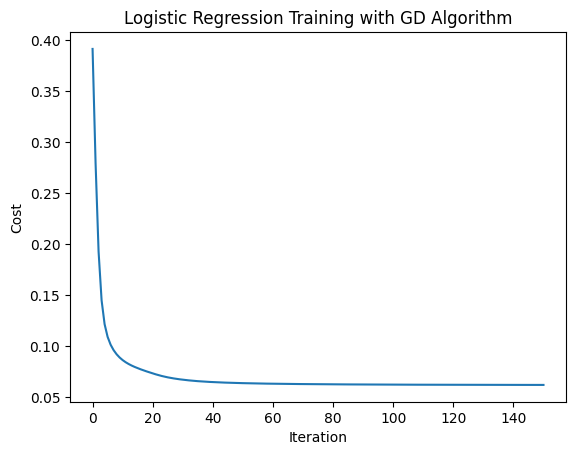

In [46]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt

# define model
def model(x_p, w):
    # compute linear comb and return
    a = w[0] + np.dot(x_p, w[1:])
    return a

# define sigmoid
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

# MSE function
def MSE_cost(w, x, y,lamb):
    cost = 0
    mult = model(x,w)

    for i in range(7000):
      cost += (sigmoid(mult[i])-y[i])**2

    return (cost/y.size) + lamb*np.linalg.norm(w)

# logistric regression script
x = X[0:10000,:]
y = y[0:10000]

dim3 = np.shape(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Further split the training data to create a validation set (70% training, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# Regularization coefficient
lambd = 0.01

def c(t):
  c = MSE_cost(t,X_train,y_train,lambd)
  return c

# gradient descent function
def gradient_descent (func, alpha, max_its , w, p):
  # compute gradient
  gradient = grad(func)

  # gradient descent loop
  weight_history = [w] # weight history container
  cost_history = [func(w)] # cost history container

  for k in range(max_its):
    # eval gradient
    grad_eval = gradient(w)
    # take grad descent step
    w = w - alpha* (grad_eval/(np.linalg.norm(grad_eval+0.1)))
    if p:
      plt.plot(w, func(w), 'kx')

    # record weight and cost
    weight_history.append(w)
    cost_history.append(func(w))

  return weight_history , cost_history

iter = 150

# Randomly initialize weights
w = np.random.rand(19, 1)

a, b = gradient_descent(c,1,iter,w,0)
plt.figure(0)
plt.plot(b)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Logistic Regression Training with GD Algorithm")

Accuracy

In [47]:
dim2 = np.shape(X_test)

pred2 = np.array([np.zeros(dim2[0])])
pred2 = np.transpose(pred2)

for i in range(dim2[0]):
  pred2[i] = model(X_test[i,:],a[iter])
  if pred2[i]<0.5:
    pred2[i] = 0
  else:
    pred2[i] = 1

# Print confusion matrix
print(pd.crosstab(np.transpose(pred2), np.transpose(y_test)))

cnt = 0
for i in range(dim2[0]):
  if (y_test[i] == 0 and pred2[i]==0) or ((y_test[i] == 1 and pred2[i]==1)):
    cnt = cnt + 1
  else:
    continue

print('Accuracy: ',cnt/dim2[0]*100,'%')

col_0     0    1
row_0           
0.0    1398   29
1.0      90  483
Accuracy:  94.05 %


In [48]:
np.transpose(a[iter])

array([[-1.18091017, -0.01221867,  0.09685614,  0.84282917,  0.13460342,
        -0.09296   ,  0.12983972, -0.00457916,  0.01419471,  0.03056454,
        -0.0176219 , -0.02416779,  0.03563392,  0.08827971,  0.07873726,
         0.00344186, -0.03567302,  0.51030662,  1.00372879]])

Classification using built-in KNN function

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Dataset
ratio = 0.2
P = 20000
X_knn = X[0:P,:]
y_knn = y[0:P]

# Split the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Further split the training data to create a validation set (70% training, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train_knn, y_train_knn)

# Make predictions on the test set
predictions_knn = knn.predict(X_test_knn)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test_knn, predictions_knn)
print(f'Accuracy: {accuracy_knn*100:.2f}%')

Accuracy: 96.25%


Develop KNN Algorithm from scratch with different values of parameter k

KNN Accuracy considering  2  nearest neighbors:  83.0 %
KNN Accuracy considering  3  nearest neighbors:  87.4 %
KNN Accuracy considering  4  nearest neighbors:  85.5 %
KNN Accuracy considering  5  nearest neighbors:  88.9 %
KNN Accuracy considering  6  nearest neighbors:  88.6 %
KNN Accuracy considering  7  nearest neighbors:  89.60000000000001 %
KNN Accuracy considering  8  nearest neighbors:  88.7 %
KNN Accuracy considering  9  nearest neighbors:  89.4 %
KNN Accuracy considering  10  nearest neighbors:  89.2 %
KNN Accuracy considering  11  nearest neighbors:  90.0 %
KNN Accuracy considering  12  nearest neighbors:  89.60000000000001 %
KNN Accuracy considering  13  nearest neighbors:  90.10000000000001 %
KNN Accuracy considering  14  nearest neighbors:  89.8 %
KNN Accuracy considering  15  nearest neighbors:  90.2 %
KNN Accuracy considering  16  nearest neighbors:  89.7 %
KNN Accuracy considering  17  nearest neighbors:  90.3 %


Text(0.5, 1.0, 'Accuracy of KNN Algorithm VS Parameter K')

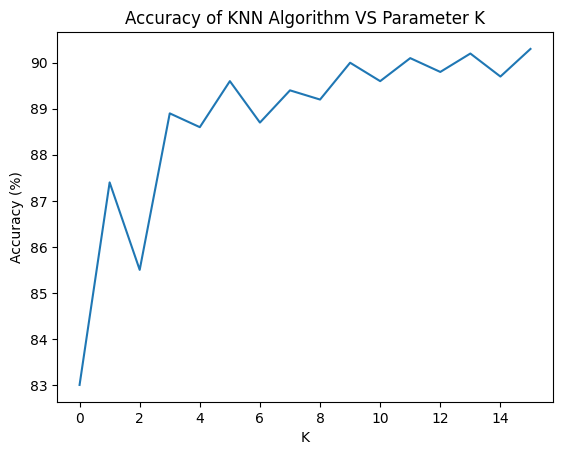

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load Dataset
ratio = 0.2
P = 5000
X_knn2 = X[0:P,:]
y_knn2 = y[0:P]

# Split the data into training and testing sets
X_train_knn2, X_test_knn2, y_train_knn2, y_test_knn2 = train_test_split(X_knn2, y_knn2, test_size=0.2, random_state=42)

# Further split the training data to create a validation set (70% training, 10% validation)
X_train_knn2, X_val_knn2, y_train_knn2, y_val_knn2 = train_test_split(X_train_knn2, y_train_knn2, test_size=0.125, random_state=42)

def euclidean_distance(x1, x2):
      return np.sqrt(np.sum((x1 - x2)**2))

def k_nearest_neighbors(X_train, y_train, X_test, k):
    predictions = []

    for test_sample in X_test:
        distances = [euclidean_distance(test_sample, train_sample) for train_sample in X_train]
        sorted_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[sorted_indices]
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(counts)]
        predictions.append(predicted_label)

    return np.array(predictions)

K = 18

predictions_knn = np.zeros((K,int(ratio*P)))
accuracy_knn = np.zeros(K)

# Make Predictions
for k in range(2,K):  #number of nearest data points
  predictions_knn[k,:] = k_nearest_neighbors(X_train_knn2, y_train_knn2, X_test_knn2, k)

  # Evaluate accuracy
  accuracy_knn[k] = np.sum(predictions_knn[k,:] == y_test_knn2) / len(y_test_knn2)
  print("KNN Accuracy considering ",k," nearest neighbors: ", accuracy_knn[k]*100, "%")

plt.plot(accuracy_knn[2:18]*100)
plt.xlabel("K")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of KNN Algorithm VS Parameter K")

Running KNN with different dataset sizes

KNN Accuracy considering  3000  data samples:  80.66666666666666 %
KNN Accuracy considering  4000  data samples:  83.625 %
KNN Accuracy considering  5000  data samples:  87.4 %
KNN Accuracy considering  6000  data samples:  89.5 %
KNN Accuracy considering  7000  data samples:  89.28571428571429 %
KNN Accuracy considering  8000  data samples:  90.75 %
KNN Accuracy considering  9000  data samples:  92.22222222222223 %
KNN Accuracy considering  10000  data samples:  93.10000000000001 %
KNN Accuracy considering  15000  data samples:  95.1 %
KNN Accuracy considering  20000  data samples:  96.25 %


Text(0.5, 1.0, 'Accuracy of KNN Algorithm VS Dataset Size')

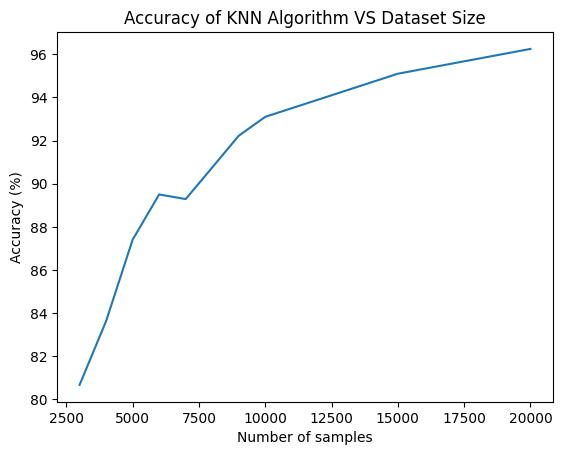

In [53]:
# Load Dataset
P = [3000,4000,5000,6000,7000,8000,9000,10000,15000,20000]
ratio = 0.2

accuracy_knn = np.zeros(np.size(P))

for i in range(int(np.size(P))):
  X_knn3 = X[0:P[i],:]
  y_knn3 = y[0:P[i]]

  # Split the data into training and testing sets
  X_train_knn3, X_test_knn3, y_train_knn3, y_test_knn3 = train_test_split(X_knn3, y_knn3, test_size=0.2, random_state=42)

  # Further split the training data to create a validation set (70% training, 10% validation)
  X_train_knn3, X_val_knn3, y_train_knn3, y_val_knn3 = train_test_split(X_train_knn3, y_train_knn3, test_size=0.125, random_state=42)

  k = 3

  predictions_knn = np.zeros(int(ratio*P[i]))

  # Make Predictions
  predictions_knn = k_nearest_neighbors(X_train_knn3, y_train_knn3, X_test_knn3, k)

  # Evaluate accuracy
  accuracy_knn[i] = np.sum(predictions_knn == y_test_knn3) / len(y_test_knn3)
  print("KNN Accuracy considering ",P[i]," data samples: ", accuracy_knn[i]*100, "%")

plt.plot(P,accuracy_knn*100)
plt.xlabel("Number of samples")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of KNN Algorithm VS Dataset Size")

Confusion Matrix

In [54]:
# Print confusion matrix
print(pd.crosstab(np.transpose(predictions_knn), np.transpose(y_test_knn3)))

col_0     0    1
row_0           
0      3117   49
1       101  733


**Classification with Artificial Neural Network (ANN) using built-in package**

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import datasets

X_ANN = X[0:20000,:]
y_ANN = y[0:20000]

# Split the data into training and testing sets
X_train_ANN, X_test_ANN, y_train_ANN, y_test_ANN = train_test_split(X_ANN, y_ANN, test_size=0.2, random_state=42)

# Further split the training data to create a validation set (70% training, 10% validation)
X_train_ANN, X_val_ANN, y_train_ANN, y_val_ANN = train_test_split(X_train_ANN, y_train_ANN, test_size=0.125, random_state=42)

# create an instance of MLP classifier
clf = MLPClassifier ( solver = 'lbfgs', alpha=1, hidden_layer_sizes =(10,1))

# train model
clf.fit(X_train_ANN, y_train_ANN)

y_pred_ANN = clf.predict(X_test_ANN)

# prediction
dim8 = np.shape(X_test_ANN)

for i in range(dim8[0]):
  if y_pred_ANN[i]<0.5:
    y_pred_ANN[i] = 0
  else:
    y_pred_ANN[i]=1

# Print confusion matrix
print(pd.crosstab(np.transpose(y_pred_ANN), np.transpose(y_test_ANN)))

# Calculate accuracy
cnt = 0
for i in range(dim8[0]):
  if (y_test_ANN[i] == 0 and y_pred_ANN[i]==0) or ((y_test_ANN[i] == 1 and y_pred_ANN[i]==1)):
    cnt = cnt + 1
  else:
    continue

print('Accuracy: ',cnt/dim8[0]*100,'%')


col_0     0    1
row_0           
0      3115   28
1       103  754
Accuracy:  96.72500000000001 %


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


**Classification with Artificial Neural Network (ANN) from scratch**

In [109]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.random.randn(1, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.random.randn(1, self.output_size)

        self.cost = []

    def activation(self, x):
        return np.tanh(x)

    def activation_derivative(self, x):
        t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
        return 1-t**2

    def forward_pass(self, X):
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_layer_activation = self.activation(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_activation, self.weights_hidden_output) + self.bias_hidden_output
        self.output = self.activation(self.output_layer_input)
        return self.output

    def backward_pass(self, X, y, output):
        error = y - output.T
        d_output = error.T * self.activation_derivative(output)

        error_hidden = d_output.dot(self.weights_hidden_output.T)
        d_hidden_layer = error_hidden * self.activation_derivative(self.hidden_layer_activation)

        # Update weights and biases using gradient descent
        self.weights_hidden_output += self.hidden_layer_activation.T.dot(d_output)
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True)
        self.weights_input_hidden += X.T.dot(d_hidden_layer)
        self.bias_input_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward_pass(X)
            self.backward_pass(X, y, output)
            loss = np.mean(np.square(y - output))
            self.cost.append(loss)
            #print(f"Epoch {epoch}, Loss: {loss:.4f}")


# Load dataset
X_ANN4 = X[0:20000,:]
y_ANN4 = y[0:20000]

# Change labels to {-1,1}
for i in range(20000):
  if y_ANN4[i] == 0:
    y_ANN4[i] = -1
  else:
    continue

# Split the data into training and testing sets
X_train_ANN, X_test_ANN, y_train_ANN, y_test_ANN = train_test_split(X_ANN4, y_ANN4, test_size=0.2, random_state=42)

# Further split the training data to create a validation set (70% training, 10% validation)
X_train_ANN, X_val_ANN, y_train_ANN, y_val_ANN = train_test_split(X_train_ANN, y_train_ANN, test_size=0.125, random_state=42)

# Initialize neural network with input, hidden, and output layer sizes
input_size = 18
hidden_size = 10
output_size = 1

# Create a neural network object
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
nn.train(X_train_ANN, y_train_ANN, epochs=15)

#plt.plot(nn.cost)
#plt.xlabel("Iteration")
#plt.ylabel("Cost")
#plt.title('Binary Classification Training with Fully Connected Neural Network')

# Test the trained model
output = nn.forward_pass(X_test_ANN)

dim9 = np.shape(X_test_ANN)

# Threshold predictions
for i in range(dim9[0]):
  if output[i]<0:
    output[i] = -1
  else:
    output[i]=1

# Confusion matrix
print(pd.crosstab(np.transpose(output), np.transpose(y_test_ANN)))

# Calculate accuracy
cnt = 0
for i in range(dim9[0]):
  if (y_test_ANN[i] == -1 and output[i]==-1) or ((y_test_ANN[i] == 1 and output[i]==1)):
    cnt = cnt + 1
  else:
    continue

print('Accuracy: ',cnt/dim9[0]*100,'%')


col_0    -1    1
row_0           
-1.0   3148  135
 1.0     70  647
Accuracy:  94.875 %


PCA Scree Plot

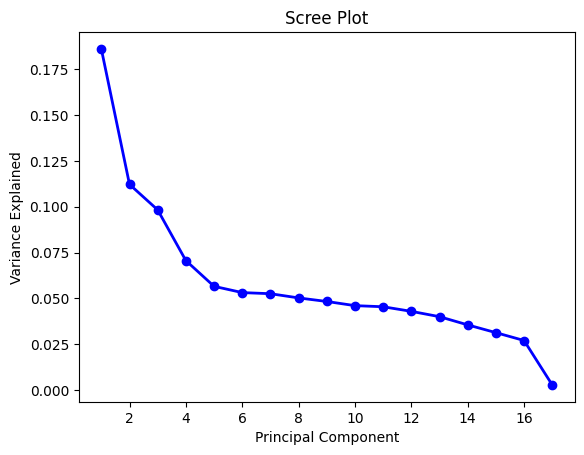

[0.18622167 0.1122322  0.0982962  0.0706128  0.05655615 0.05313199
 0.05252378 0.05022213 0.04827786 0.04600645 0.04539967 0.04288816
 0.03997434 0.03549626 0.03125982 0.02696163 0.00270158]


In [79]:
#define PCA model to use
pca2 = PCA(n_components=17)

#fit PCA model to data
pca_fit = pca2.fit(X)

PC_values = np.arange(pca2.n_components_) + 1
plt.plot(PC_values, pca2.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

print(pca2.explained_variance_ratio_)


**Dimension Reduction with built-in PCA function**

Shape of X: (1048573, 18)
Shape of transformed X: (1048573, 2)


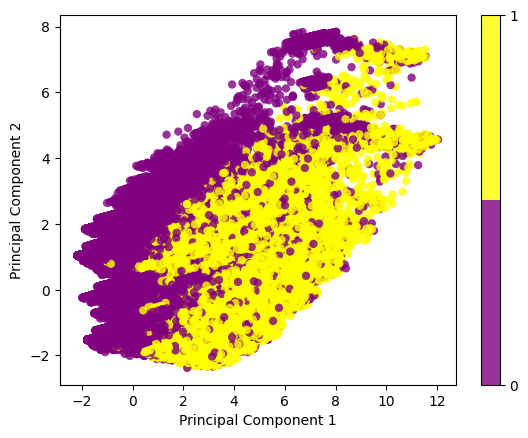

In [119]:
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming df is your DataFrame

X = df.iloc[2:, :-1]  # Features (all columns except the last one)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.iloc[2:, -1])  # Target variable (last column)
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

# Create scatter plot
plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=mcolors.ListedColormap(['purple', 'yellow']))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(ticks=[0, 1])
plt.show()

**Dimension Reduction with PCA from scratch**

In [116]:

class myPCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

    # Assuming the last column is the label and the rest are features
    X = df.iloc[2:, :-1]  # Features (all columns except the last one)

    # Encode the target variable
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df.iloc[2:, -1])  # Target variable (last column)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)


Call myPCA Class

Shape of X: (1048573, 18)
Shape of transformed X: (1048573, 2)


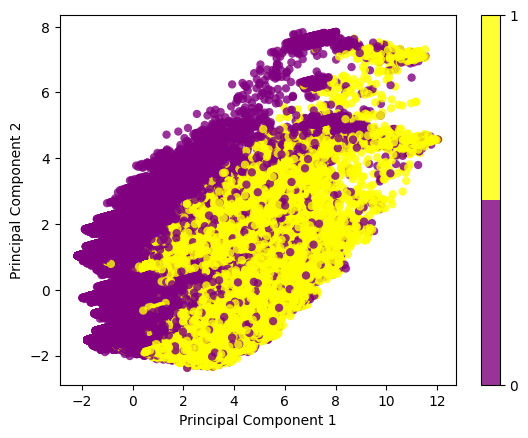

In [120]:
pca = myPCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(-x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=mcolors.ListedColormap(['purple', 'yellow']))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(ticks=[0, 1])
plt.show()

**Implement Logistic Regression with built-in SKearn package and PCA**

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_projected, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
log_regress = LogisticRegression()

log_regress.fit(X_train_pca, y_train_pca)
y_pred_pca = log_regress.predict(X_test_pca)

# Print confusion matrix
print(pd.crosstab(y_pred_pca, y_test_pca))#print(pd.crosstab(y_pred, y))

cnt = 0
dim4 = np.shape(X_test_pca)

for i in range(dim4[0]):
  if (y_test_pca[i] == 0 and y_pred_pca[i]==0) or ((y_test_pca[i] == 1 and y_pred_pca[i]==1)):
    cnt = cnt + 1
  else:
    continue

print('Accuracy: ',cnt/dim4[0]*100,'%')

col_0       0      1
row_0               
0      170152  10042
1        6526  22995
Accuracy:  92.09975442862934 %


**Implement Logistic Regression with Binary Cross-Entropy Cost and PCA**

col_0       0      1
row_0               
0.0    170093  10258
1.0      6585  22779
Accuracy:  91.96862408506783 %


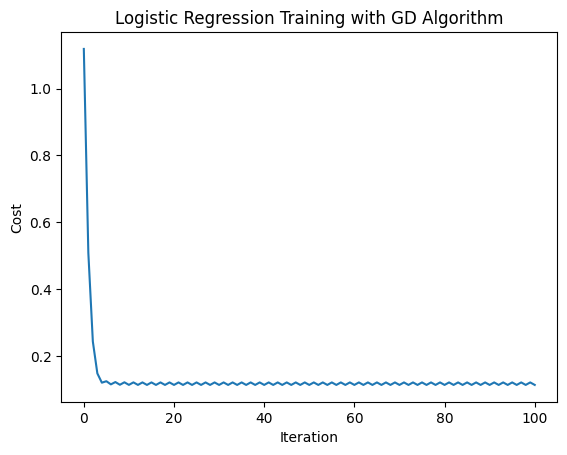

In [76]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# define model
def model(x_p,w):
  # compute linear comb and return
  a = w[0] + np.dot(x_p, w[1:])
  return a

# define sigmoid
def sigmoid(t):
  return 1/(1+np.exp(-t))

# cross-entropy function
def cross_entropy(w,x,y):
  # compute sigmoid of model
  a = sigmoid(model(x,w))

  # compute cost of label 0 points
  ind = np.argwhere (y==0)[:,0]
  cost = -np.sum (np.log(1-a[ind,:]+0.05))

  # add cost of label 1 points
  ind = np.argwhere (y==1)[:,0]
  cost -= np.sum (np.log(a[ind,:]+0.05))

  # compute cross-entropy
  return cost/y.size

# logistric regression script
x = X_projected
y = y

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x, y, test_size=0.2, random_state=42)

def c(t):
  c = cross_entropy(t,X_train_pca,y_train_pca)
  return c

# gradient descent function
def gradient_descent (func, alpha, max_its , w, p):
  # compute gradient
  gradient = grad(func)

  # gradient descent loop
  weight_history = [w] # weight history container
  cost_history = [func(w)] # cost history container

  for k in range(max_its):
    # eval gradient
    grad_eval = gradient(w)
    # take grad descent step
    w = w - alpha* (grad_eval/(np.linalg.norm(grad_eval)))
    if p:
      plt.plot(w, func(w), 'kx')

    # record weight and cost
    weight_history.append(w)
    cost_history.append(func(w))

  return weight_history , cost_history

iter = 100

# Randomly initialize weights
w = np.random.rand(3, 1)

a, b = gradient_descent(c,1,iter,w,0)
plt.figure(0)
plt.plot(b)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Logistic Regression Training with GD Algorithm")

# prediction
dim5 = np.shape(X_test_pca)

pred_pca = np.array([np.zeros(dim5[0])])
pred_pca = np.transpose(pred_pca)

for i in range(dim5[0]):
  pred_pca[i] = model(X_test_pca[i,:],a[iter])
  if pred_pca[i]<0.5:
    pred_pca[i] = 0
  else:
    pred_pca[i]=1

# Print confusion matrix
print(pd.crosstab(np.transpose(pred_pca), np.transpose(y_test_pca)))

# Calculate accuracy
cnt = 0
for i in range(dim5[0]):
  if (y_test_pca[i] == 0 and pred_pca[i]==0) or ((y_test_pca[i] == 1 and pred_pca[i]==1)):
    cnt = cnt + 1
  else:
    continue

print('Accuracy: ',cnt/dim5[0]*100,'%')

**Implement Logistic Regression with MSE Cost and PCA**

col_0     0    1
row_0           
0.0    1359  129
1.0     148  364
Accuracy:  86.15 %


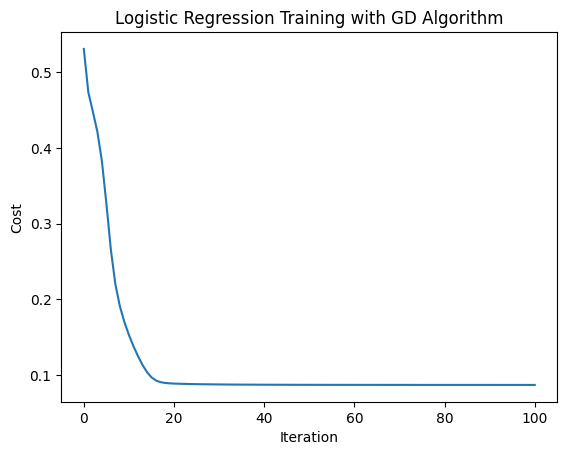

In [31]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt

# define model
def model(x_p, w):
    # compute linear comb and return
    a = w[0] + np.dot(x_p, w[1:])
    return a

# define sigmoid
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

# MSE function
def MSE_cost(w, x, y):
    cost = 0
    mult = model(x,w)

    for i in range(8000):
      cost += (sigmoid(mult[i])-y[i])**2

    return cost / y.size

# logistric regression script
x = X_projected[0:10000,:]
y = y[0:10000]

dim6 = np.shape(x)

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x, y, test_size=0.2, random_state=42)

def c(t):
  c = MSE_cost(t,X_train_pca,y_train_pca)
  return c

# gradient descent function
def gradient_descent (func, alpha, max_its , w, p):
  # compute gradient
  gradient = grad(func)

  # gradient descent loop
  weight_history = [w] # weight history container
  cost_history = [func(w)] # cost history container

  for k in range(max_its):
    # eval gradient
    grad_eval = gradient(w)
    # take grad descent step
    w = w - alpha* (grad_eval/(np.linalg.norm(grad_eval+0.1)))
    if p:
      plt.plot(w, func(w), 'kx')

    # record weight and cost
    weight_history.append(w)
    cost_history.append(func(w))

  return weight_history , cost_history

iter = 100

# Randomly initialize weights
w = np.random.rand(3, 1)

a, b = gradient_descent(c,1,iter,w,0)
plt.figure(0)
plt.plot(b)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Logistic Regression Training with GD Algorithm")

# prediction
dim7 = np.shape(X_test_pca)

pred_pca = np.array([np.zeros(dim7[0])])
pred_pca = np.transpose(pred_pca)

for i in range(dim7[0]):
  pred_pca[i] = model(X_test_pca[i,:],a[iter])
  if pred_pca[i]<0.5:
    pred_pca[i] = 0
  else:
    pred_pca[i]=1

# Print confusion matrix
print(pd.crosstab(np.transpose(pred_pca), np.transpose(y_test_pca)))

# Calculate accuracy
cnt = 0
for i in range(dim7[0]):
  if (y_test_pca[i] == 0 and pred_pca[i]==0) or ((y_test_pca[i] == 1 and pred_pca[i]==1)):
    cnt = cnt + 1
  else:
    continue

print('Accuracy: ',cnt/dim7[0]*100,'%')

**PCA + KNN**

Built-in

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Dataset
ratio = 0.2
P = 20000
X_knn_PCA2 = X_projected[0:P,:]
y_knn_PCA2 = y[0:P]

# Split the data into training and testing sets
X_train_knn_PCA2, X_test_knn_PCA2, y_train_knn_PCA2, y_test_knn_PCA2 = train_test_split(X_knn_PCA2, y_knn_PCA2, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=3
knn_PCA2 = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn_PCA2.fit(X_train_knn_PCA2, y_train_knn_PCA2)

# Make predictions on the test set
predictions_knn_PCA2 = knn_PCA2.predict(X_test_knn_PCA2)

# Calculate accuracy
accuracy_knn_PCA2 = accuracy_score(y_test_knn_PCA2, predictions_knn_PCA2)
print(f'Accuracy: {accuracy_knn_PCA2*100:.2f}%')

Accuracy: 95.45%


From scratch

In [60]:
def euclidean_distance(x1, x2):
      return np.sqrt(np.sum((x1 - x2)**2))

def k_nearest_neighbors(X_train, y_train, X_test, k):
    predictions = []

    for test_sample in X_test:
        distances = [euclidean_distance(test_sample, train_sample) for train_sample in X_train]
        sorted_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[sorted_indices]
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(counts)]
        predictions.append(predicted_label)

    return np.array(predictions)

# logistric regression script
x_PCA_knn = X_projected[0:20000,:]
y_PCA_knn = y[0:20000]

# Split the data into training and testing sets
X_train_PCA_knn, X_test_PCA_knn, y_train_PCA_knn, y_test_PCA_knn = train_test_split(x_PCA_knn, y_PCA_knn, test_size=0.2, random_state=42)

# Load Dataset
P = 20000
ratio = 0.2
k = 3

predictions_PCA_knn = np.zeros(int(ratio*P))

# Make Predictions
predictions_PCA_knn = k_nearest_neighbors(X_train_PCA_knn, y_train_PCA_knn, X_test_PCA_knn, k)

# Evaluate accuracy
accuracy_PCA_knn = np.sum(predictions_PCA_knn == y_test_PCA_knn) / len(y_test_PCA_knn)
print("KNN Accuracy considering ",P," data samples: ", accuracy_PCA_knn*100, "%")

KNN Accuracy considering  20000  data samples:  92.625 %


**PCA + Neural Network**

Using built-in package

In [106]:
# logistric regression script
x_PCA_nn = X_projected[0:20000,:]
y_PCA_nn = y[0:20000]

# Split the data into training and testing sets
X_train_PCA_nn, X_test_PCA_nn, y_train_PCA_nn, y_test_PCA_nn = train_test_split(x_PCA_nn, y_PCA_nn, test_size=0.2, random_state=42)

# Further split the training data to create a validation set (70% training, 10% validation)
X_train_PCA_nn, X_val_PCA_nn, y_train_PCA_nn, y_val_PCA_nn = train_test_split(X_train_PCA_nn, y_train_PCA_nn, test_size=0.125, random_state=42)

# create an instance of MLP classifier
# layer 1 with N+1 inputs 5 out, layer 2
# with 5 in and 2 out, layer 3 with 2 in
# and 2 out
# stochastic gradient descent sgd ) or
# quasi newton lbfgs ) solver
# alpha is the regularization parameter
clf = MLPClassifier ( solver = 'lbfgs', alpha=1, hidden_layer_sizes =(10,1))

# train model
clf.fit(X_train_PCA_nn, y_train_PCA_nn)

y_pred_PCA_nn = clf.predict(X_test_PCA_nn)

# prediction
dim10 = np.shape(X_test_PCA_nn)

for i in range(dim10[0]):
  if y_pred_PCA_nn[i]<0.5:
    y_pred_PCA_nn[i] = 0
  else:
    y_pred_PCA_nn[i]=1

# Print confusion matrix
print(pd.crosstab(np.transpose(y_pred_PCA_nn), np.transpose(y_test_PCA_nn)))

# Calculate accuracy
cnt = 0
for i in range(dim10[0]):
  if (y_test_PCA_nn[i] == 0 and y_pred_PCA_nn[i]==0) or ((y_test_PCA_nn[i] == 1 and y_pred_PCA_nn[i]==1)):
    cnt = cnt + 1
  else:
    continue

print('Accuracy: ',cnt/dim10[0]*100,'%')

col_0     0    1
row_0           
0      3019   41
1       199  741
Accuracy:  94.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


From scratch

In [97]:
# logistric regression script
x_PCA_nn2 = X_projected[0:20000,:]
y_PCA_nn2 = y[0:20000]

# Change labels to {-1,1}
for i in range(20000):
  if y_PCA_nn2[i] == 0:
    y_PCA_nn2[i] = -1
  else:
    continue

# Split the data into training and testing sets
X_train_PCA_nn2, X_test_PCA_nn2, y_train_PCA_nn2, y_test_PCA_nn2 = train_test_split(x_PCA_nn2, y_PCA_nn2, test_size=0.2, random_state=42)

# Further split the training data to create a validation set (70% training, 10% validation)
X_train_PCA_nn2, X_val_PCA_nn2, y_train_PCA_nn2, y_val_PCA_nn2 = train_test_split(X_train_PCA_nn2, y_train_PCA_nn2, test_size=0.125, random_state=42)

# Initialize neural network with input, hidden, and output layer sizes
input_size = 2
hidden_size = 10
output_size = 1

# Create a neural network object
nn2 = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
nn2.train(X_train_PCA_nn2, y_train_PCA_nn2, epochs=15)

#plt.plot(nn2.cost)
#plt.xlabel("Iteration")
#plt.ylabel("Cost")
#plt.title('Binary Classification Training with Fully Connected Neural Network')

# Test the trained model
output2 = nn2.forward_pass(X_test_PCA_nn2)

dim11 = np.shape(X_test_PCA_nn2)

# Threshold predictions
for i in range(dim11[0]):
  if output2[i]<0:
    output2[i] = -1
  else:
    output2[i]=1

# Confusion matrix
print(pd.crosstab(np.transpose(output2), np.transpose(y_test_PCA_nn2)))

# Calculate accuracy
cnt = 0
for i in range(dim11[0]):
  if (y_test_PCA_nn2[i] == -1 and output2[i]==-1) or ((y_test_PCA_nn2[i] == 1 and output2[i]==1)):
    cnt = cnt + 1
  else:
    continue

print('Accuracy: ',cnt/dim11[0]*100,'%')

col_0    -1    1
row_0           
-1.0   2907   66
 1.0    311  716
Accuracy:  90.575 %
